### Importing Necessary Libraries and Functions

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms


import numpy as np
import matplotlib.pyplot as plt

### Device selection if availabe GPU else CPU

In [47]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  print('GPU selected for computations')
else:
  device = torch.device("cpu")
  print('CPU selected for computations')

CPU selected for computations


### MNIST Dataset Loading

In [48]:
train_set = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transforms.ToTensor())

### Creating DataLoader for TrainSet and TestSet with batch_size=500

In [49]:

classes = 10
batch_size = 500
lr = 0.001
train_loader = torch.utils.data.DataLoader(train_set,batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set,batch_size,shuffle=False)


### ConvNet for MNIST with following Architechture
- Conv2D 5x5 32
- ReLU
- BatchNorm2D

- Conv2D 3x3 32
- ReLU
- BatchNorm2D

- Conv2D 3x3 32
- ReLU
- BatchNorm2D

- MaxPool2D 32

- Conv2D 5x5 64
- ReLU
- BatchNorm2D

- Conv2D 3x3 64
- ReLU
- BatchNorm2D

- Conv2D 3x3 64
- ReLU
- BatchNorm2D

- Flatten

- Linear 256

- Linear 128

- Linear 10 



In [50]:
class ConvNet(nn.Module):
    def __init__(self, classes=10):
        super(ConvNet, self).__init__()

        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=32),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=64)
            #nn.MaxPool2d(kernel_size=2,stride=2)
        )
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(2*2*64,128)
        self.fc2 = nn.Linear(128,10)
        

    def forward(self,x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [51]:
model = ConvNet(classes).to(device)
print(model)

ConvNet(
  (block1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(64, 64, kernel_size=

### Defining Loss function and Optimizer

In [52]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=lr)

### Training Loop 

In [53]:
loss_list =[]
acc_list =[]
epochs = 25
for epoch in range(epochs):
    total_correct = 0
    total_loss = 0 
    for images,labels in iter(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        preds = model(images)
        loss = criterion(preds,labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_correct += preds.argmax(dim=1).eq(labels).sum().item()
        total_loss += loss.item()
    loss_list.append(total_loss/batch_size)
    acc_list.append(total_correct/600)
    print("Epoch [%d/%d] Total Correct [%d/60000] Total loss : %.4f"%(epoch+1,epochs,total_correct,total_loss)) 

Epoch [1/25] Total Correct [57244/60000] Total loss : 19.9223
Epoch [2/25] Total Correct [59364/60000] Total loss : 4.1522
Epoch [3/25] Total Correct [59554/60000] Total loss : 2.9567
Epoch [4/25] Total Correct [59627/60000] Total loss : 2.2815
Epoch [5/25] Total Correct [59667/60000] Total loss : 1.9741
Epoch [6/25] Total Correct [59762/60000] Total loss : 1.5045
Epoch [7/25] Total Correct [59806/60000] Total loss : 1.2666
Epoch [8/25] Total Correct [59862/60000] Total loss : 0.8396
Epoch [9/25] Total Correct [59799/60000] Total loss : 1.1993
Epoch [10/25] Total Correct [59815/60000] Total loss : 1.0855
Epoch [11/25] Total Correct [59903/60000] Total loss : 0.6282
Epoch [12/25] Total Correct [59875/60000] Total loss : 0.8058
Epoch [13/25] Total Correct [59877/60000] Total loss : 0.7562
Epoch [14/25] Total Correct [59886/60000] Total loss : 0.6484
Epoch [15/25] Total Correct [59884/60000] Total loss : 0.6819
Epoch [16/25] Total Correct [59927/60000] Total loss : 0.4176
Epoch [17/25] To

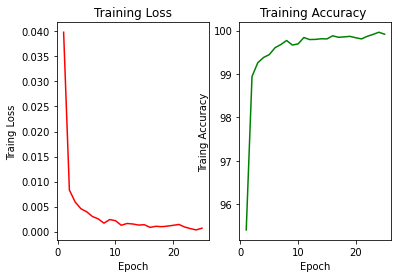

In [56]:
plt.subplot(1,2,1)
plt.plot(range(1,epochs+1),loss_list,'r')
plt.ylabel('Traing Loss')
plt.xlabel('Epoch')
plt.title('Training Loss')
plt.subplot(1,2,2)
plt.plot(range(1,epochs+1),acc_list,'g')
plt.ylabel('Traing Accuracy')
plt.xlabel('Epoch')
plt.title('Training Accuracy ')
#plt.show()
plt.savefig('A2_MNIST_TRAIN.PNG')

### Testing

In [55]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        preds = model(images)
        correct += preds.argmax(dim=1).eq(labels).sum().item()

    print("Model accuracy on %d test images is : %.3f"%(batch_size*len(test_loader),100*correct/(batch_size*len(test_loader))))


Model accuracy on 10000 test images is : 99.240
